In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
assignees = pd.read_csv('../../Data/assignee_list_PatentView.csv')

In [3]:
print('number of assignees:',len(assignees))
assignees.head()

number of assignees: 97


,Unnamed: 0,assignee_first_name,assignee_id,assignee_key_id,assignee_last_name,assignee_organization,assignee_total_num_inventors,assignee_total_num_patents,location_city,location_country,location_id,location_key_id,location_latitude,location_longitude
0,0,NaN,org_0eMcj81DlE96rtIdXqX9,7499,NaN,Lifeind ehf.,4,2,Reykjavik,IS,64.15|-21.95,34366,64.1500,-21.9500
1,1,NaN,org_0LzwWua1ah5ocjHw7dAF,9166,NaN,MAREL ICELAND EHF,10,7,Gardabaer,IS,64.0788|-21.8909,22608,64.0788,-21.8909
2,2,NaN,org_1BXNDdJbguuZcxLj8Etb,13823,NaN,3X TECHNOLOGY,2,1,Isafjordur,IS,66.0738|-23.1417,59329,66.0738,-23.1417
3,3,NaN,org_231GW9xFdFlMqRFRXL2d,19600,NaN,Lipomedica ehf.,2,1,Reykjavik,IS,64.15|-21.95,34366,64.1500,-21.9500
4,4,NaN,org_2aUnpUxK2pzGqt5h1c5W,20571,NaN,LYSI HF,3,1,Reykjavik,IS,64.15|-21.95,34366,64.1500,-21.9500


In [4]:
assignees = assignees[['assignee_id','assignee_organization','assignee_first_name','assignee_last_name']]

In [5]:
def is_ascii(s):
    if type(s) == type(1.0):
        return False
    return all(ord(c) < 128 for c in s)

In [6]:
is_ascii('HÃ¡skÃ³li Ãslands')

False

In [8]:
# fixed_assignees.head()

In [9]:
def fix_mojibake(x):
    if is_ascii(x):
        return x
    if type(x) != type('str'):
        return x
    try:
        fixed = x.encode('cp1252').decode('utf-8')
#         print(fixed)
    except (UnicodeEncodeError,UnicodeDecodeError) as err:
        encodings = ['ascii','big5','big5hkscs','cp037','cp424','cp437',
                     'cp500','cp737','cp775','cp850','cp852','cp855',
                     'cp856','cp857','cp860','cp861','cp862','cp863',
                     'cp864','cp865','cp866','cp869','cp874','cp875',
                     'cp932','cp949','cp950','cp1006','cp1026','cp1140',
                     'cp1250','cp1251','cp1252','cp1253','cp1254','cp1255',
                     'cp1256','cp1257','cp1258','euc_jp','euc_jis_2004','euc_jisx0213',
                     'euc_kr','gb2312','gbk','gb18030','hz','iso2022_jp','iso2022_jp_1',
                     'iso2022_jp_2','iso2022_jp_2004','iso2022_jp_3','iso2022_jp_ext','iso2022_kr',
                     'latin_1','iso8859_2','iso8859_3','iso8859_4','iso8859_5','iso8859_6','iso8859_7',
                     'iso8859_8','iso8859_9','iso8859_10','iso8859_13','iso8859_14',
                     'iso8859_15','johab','koi8_r','koi8_u','mac_cyrillic',
                     'mac_greek','mac_iceland','mac_latin2','mac_roman','mac_turkish','ptcp154',
                     'shift_jis','shift_jis_2004','shift_jisx0213','utf_16','utf_16_be','utf_16_le',
                     'utf_7','utf_8']
        for enc in encodings:
            try:
#                 print(enc)
                encoded = x.encode(enc)
#                 print('encoded:',encoded)
                decoded = encoded.decode('utf-8')
#                 print(decoded)
                return decoded
            except UnicodeEncodeError as err2:
                pass
            except UnicodeDecodeError as err3:
                pass
                  
            
        return 
        
    return fixed

In [10]:
print(fix_mojibake('HÃ¡skÃ³li Ãslands'))
print(fix_mojibake('Babcock & Wilcox VÃ¸lund A/S'))

Háskóli Íslands
Babcock & Wilcox Vølund A/S


In [11]:
baked_index = assignees[[not is_ascii(x) for x in assignees['assignee_organization']]].index

In [12]:
fixed_assignees = assignees.copy(deep=True)
for col in fixed_assignees.columns[1:]:
    fixed_assignees[col] = fixed_assignees[col].apply((lambda x: fix_mojibake(x)))

In [13]:
fixed_assignees.iloc[baked_index].head()

,assignee_id,assignee_organization,assignee_first_name,assignee_last_name
18,org_9IpHrahEmm5LrXuoEBGK,$(D*S(Bssur hf,NaN,NaN
23,org_ASERyuqDgGkPmRFfVvju,Ã–ssur hf,NaN,NaN
45,org_J71SYKWrHHqVgStRptcy,HÃ¡skÃ³linn Ã­ Reykjavik,NaN,NaN
47,org_jHaSvacRgUK6QE6565MN,$(D*S(Bssur Iceland ehf,NaN,NaN
65,org_qEM3sRd59NoakUuzdtZt,H+AMMBkgDCAKE-sk+AMMBkgDCALM-li +AMMBkgDCAI0-s...,NaN,NaN


In [14]:
fixed_assignees_companies = fixed_assignees[[type(x) != float for x in fixed_assignees.assignee_organization]]
fixed_assignees_individuals = fixed_assignees[[type(x) != float for x in fixed_assignees.assignee_first_name]]


In [15]:
print(len(fixed_assignees_companies))
print(len(fixed_assignees_individuals))

90
7


In [16]:
# Finna öll fyrirtækja keywords, sem eru hafa ekki merkingu eins og "hf" eða "ehf" á íslensku
all_words_from_names = np.hstack([x.lower().split(" ") for x in fixed_assignees_companies['assignee_organization']])

# Orðin sem koma oftast fyrir í nöfnum og hversu oft þau koma fyrir

legal_words_eq ={
    'ab':'aktiebolag',
    'oy':'osakeyhtiö',
    'a/s':'aktieselskab',
    'as':'aktieselskab',
    'a.s.':'aktieselskab',
    'aps':'anpartsselskab',
    'ltd.':'limited',
    'ltd':'limited',
    'asa':'allmennaksjeselskap',
    'oyj':'julkinen osakeyhtiö',
    'co.':'company',
    'inc.':'incorporated',
    'hb':'handelsbolag',
    'kb':'kommanditbolag',
    'ag':'aktiengesellschaft',
    '(publ)':'public',
    'hf':'hlutafélag',
    'ehf':'eignahlutafélag'
}
legal_words=['ab','aktiebolag',
    'oy','osakeyhtiö',
    'a/s','aktieselskab',
    'as','aktieselskab',
    'a.s.','aktieselskab',
    'aps','anpartsselskab',
    'ltd.','limited',
    'ltd','limited',
    'asa','allmennaksjeselskap',
    'oyj','julkinen osakeyhtiö',
    'co.','company',
    'inc.','incorporated',
    'hb','handelsbolag',
    'kb','kommanditbolag',
    'ag','aktiengesellschaft',
    '(publ)','public',
    'hf','hlutafélag',
    'h.f','H. F'
    'ehf','eignahlutafélag']
common_words = pd.Series(all_words_from_names).value_counts()
common_words

ehf                                22
ehf.                               19
hf                                 19
hf.                                 7
iceland                             6
marel                               5
ltd.                                5
university                          3
islandi                             3
ossur                               3
actavis                             3
style                               3
group                               3
pharmaceuticals                     2
a                                   2
$(d*s(bssur                       2
food                                2
flaga                               2
valka                               2
reykjavik                           2
medical                             2
prokaria                            2
nox                                 2
ptc                                 2
decode                              2
system                              2
hananja     

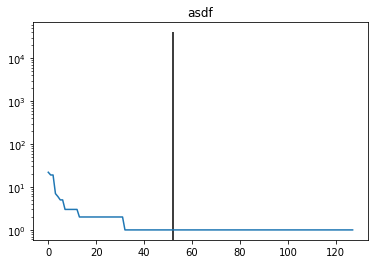

In [17]:

plt.plot(common_words.values)
plt.vlines(52,0,40000)
plt.title('asdf')
plt.yscale('log')
plt.show()

### Staðla nöfnin til pörunar
- Laga mojibake (þ.e. "HÃ¡skÃ³li Ãslands" -> Háskóli Íslands)
- Staðla leturgerð: Allt í lowercase 
- Staðla greinamerki (kommur, semikommur, etc.): Prófa að sleppa og hafa bil í staðin
- Staðla whitespaces (Allar runur af bilum verða eitt bil)
- Staðla alla broddaða stafi (Breyta þeim í samsvarandi ASCII stafi)
- Staðla orð með löglegan tilgang frá byrjun eða enda orða  (sleppa orðum eins go "hf"/"ehf", skipta út öllum "Co." fyrir "Company") notandi lista af þeim orðum



In [18]:
accented_letts = np.unique(np.hstack([[y for y in x if not is_ascii(y)] for x in std_comp_names.assignee_organization if not is_ascii(x)]))
accented_letts

NameError: name 'std_comp_names' is not defined

In [ ]:
# fixed_assignees.assignee_organization

In [ ]:
'marel'.endswith('arel')

In [ ]:
from nltk.tokenize import RegexpTokenizer

def standardize_legal_terms(string):
    new_string = string
    for lword in legal_words:
        if (string.startswith(lword+' ')) or (string.startswith(lword+'. ')):
            new_string = string.replace(lword+' ','')
        if (string.endswith(' '+lword)) or (string.endswith(' '+lword+'.')):
            new_string = string.replace(' '+lword,'')
    return new_string

def standardize_punctuation(string):
    return ''.join([x+' ' for x in RegexpTokenizer(r'\w+').tokenize(string)])[:-1]
letter_replacements = {'á':'a','â':'a','ä':'a','å':'a',
                       'æ':'ae','é':'e','ë':'e','í':'i',
                       'ð':'d','ó':'o','ô':'o','õ':'o',
                       'ö':'o','ø':'o','ü':'u','ÿ':'y',
                       'ċ':'c','ē':'e'}
def replace_accents(string):
    if not is_ascii(string):
        new_string = ''
        for n,letter in enumerate(string):
            if not is_ascii(letter):
                new_string += letter_replacements[string[n]]
            else:
                new_string += letter
        return new_string
    else:
        return string

In [19]:
fixed_assignees_companies[['marel' in x for x in fixed_assignees_companies.assignee_organization.str.lower()]]
# fixed_assignees_companies[['ossur' in x for x in fixed_assignees_companies.assignee_organization.str.lower()]]
# fixed_assignees_companies[['decode' in x for x in fixed_assignees_companies.assignee_organization.str.lower()]]


,assignee_id,assignee_organization,assignee_first_name,assignee_last_name
1,org_0LzwWua1ah5ocjHw7dAF,MAREL ICELAND EHF,NaN,NaN
7,org_46g182hVsEVRKsC10nbG,Marel Food System HF.,NaN,NaN
14,org_8RR1qfsdklVucS5hDNYp,H. F. Marel Ltd.,NaN,NaN
25,org_bHcaK6aqXHjMpVHyuDOp,Marel Food Systems HF,NaN,NaN
56,org_nu7vuTaygxFBSFwN18Fc,Marel HF,NaN,NaN


In [20]:
std_comp_names = fixed_assignees_companies.copy(deep=True)

# Allt í lowercase
std_comp_names.assignee_organization = std_comp_names.assignee_organization.str.lower()
# staðla legal-terms
std_comp_names.assignee_organization = std_comp_names.assignee_organization.apply(lambda x: standardize_legal_terms(x))
# sleppa greinamerkjum og staðla whitespaces
std_comp_names.assignee_organization = std_comp_names.assignee_organization.apply(lambda x: standardize_punctuation(x))
# staðla broddastafi
std_comp_names.assignee_organization = std_comp_names.assignee_organization.apply(lambda x: replace_accents(x))


NameError: name 'standardize_legal_terms' is not defined

In [21]:
print('fyrirtækja sem geta sameinað línur eftir stöðlun:',std_comp_names.assignee_organization.duplicated().sum())
print('fjöldi lína sem höfðu alveg eins línu:',std_comp_names.assignee_organization.duplicated(keep=False).sum())

fyrirtækja sem geta sameinað línur eftir stöðlun: 0
fjöldi lína sem höfðu alveg eins línu: 0


### Pörun nafna
- Strengir sem eru jafnir eftir stöðlun
- Edit distance (oft ekki sniðugt nema kannski fyrir 1-2 edit ef það er spurning um "hf" vs "h f" eða sambærilegt)
    - Vandamál því nxn samanburðir taka um 11gb og allt upp í 14klst að loada. 
    - Hugsanlega hægt að gera levenshtein distance reiknirit með early stopping ef það tekur >2 edit eða sambærilegt
- Samanburður á orðunum sem nafnið samanstendur af
- n-gram (NLTK) til að hunsa röðun orða 
- Jaccard index af orðum í nafni. |sniðmengi|/|sammengi| (Hægt að nota fyrir öll set af bigrams, i.e. öll sett af pörum af orðum í nöfnunum)


In [22]:
from sklearn.metrics import jaccard_similarity_score

In [23]:
from nltk import ngrams
def Jaccard_index(string_1,string_2,n=2):
    words_1 = RegexpTokenizer(r'\w+').tokenize(string_1)
    words_2 = RegexpTokenizer(r'\w+').tokenize(string_2)
    ngram_1 = ngrams(words_1,n)
    ngram_2 = ngrams(words_2,n)
    intersection = list(set([x for x in ngram_1]) & set([x for x in ngram_2]))
    ngram_1 = ngrams(words_1,n)
    ngram_2 = ngrams(words_2,n)
    union = list(set([x for x in ngram_1]) | set([x for x in ngram_2]))
    print(words_1)
    print(words_2)
    print('intersection:',intersection)
    print('union:',union)
    score = len(intersection)/len(union)
    return score

Jaccard_index('Marel Salmon A/S','Marel Food System HF.',1)
Jaccard_index('Marel Salmon A/S','Salmon Food  HF.',1)

NameError: name 'RegexpTokenizer' is not defined

In [ ]:
from nltk import edit_distance
from itertools import product

def edit_distance_check(strings):
    n_strings = len(strings)
    distances = []
    for word1, word2 in product(strings, strings):
        tmp_dist = edit_distance(word1,word2)
        distances.append(tmp_dist)
    
    distance_matrix = pd.DataFrame(np.reshape(np.array(distances),(n_strings,n_strings)))
    distance_matrix.index = strings
    distance_matrix.columns = strings
    return distance_matrix

sizes = [2**x for x in np.arange(0,7)]
times = []

for size in sizes:
    start = time.time()
    edit_distance_check(std_comp_names.assignee_organization[:size])
    times.append(time.time()-start)
    
    

In [ ]:
print('fjöldi fyrirtækja sem sameinast eftir stöðlun:',std_comp_names.assignee_organization.duplicated(keep=False).sum())
print('fjöldi fyrirtækja sem sameinast eftir stöðlun:',std_comp_names.assignee_organization.duplicated().sum())

# print('fjöldi fyrirtækja sem sameinast með edit distance:',)

In [ ]:
len(std_comp_names)

In [24]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sverrir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [25]:
from difflib import SequenceMatcher

def similar(a, b):
    a_lowcase = a.lower()
    b_lowcase = b.lower()
    return SequenceMatcher(None, a_lowcase, b_lowcase).ratio()


In [26]:
from nltk.corpus import wordnet
from itertools import product
sims = []
nameSubList = fixed_assignees_companies.assignee_organization[:100]
for word1, word2 in product(nameSubList, nameSubList):
    syns1 = wordnet.synsets(word1)
    syns2 = wordnet.synsets(word2)
    for sense1, sense2 in product(syns1, syns2):
        d = wordnet.wup_similarity(sense1, sense2)
        sims.append((d, syns1, syns2))


In [27]:
wordnet.synsets('apple')[0].__dict__

{'_wordnet_corpus_reader': <WordNetCorpusReader in 'C:\\Users\\Sverrir\\AppData\\Roaming\\nltk_data\\corpora\\wordnet'>,
 '_all_hypernyms': None}

In [28]:
from difflib import SequenceMatcher

def similar(a, b):
    a_lowcase = a.lower()
    b_lowcase = b.lower()
    return SequenceMatcher(None, a_lowcase, b_lowcase).ratio()


In [29]:
allsyns1 = set(ss for word in nameSubList for ss in wordnet.synsets(word))
allsyns2 = set(ss for word in nameSubList for ss in wordnet.synsets(word))
best = max((wordnet.wup_similarity(s1, s2) or 0, s1, s2) for s1, s2 in product(allsyns1, allsyns2))
print(best)

ValueError: max() arg is an empty sequence